<a href="https://colab.research.google.com/github/Kamaranis/Web-Scraping-de-videojuegos-con-potencial-de-revalorizacion/blob/main/PR1_web_scraping_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipología y ciclo de vida de los datos - Practica PR1

## Introducción

La propuesta inicial para este proyecto se basa en la búsqueda de un enfoque lúdico, centrado en realizar **web scraping** de sitios web relacionados con el mundo del entretenimiento, como los videojuegos, los juegos de mesa, los libros o las cartas coleccionables. Este enfoque responde a nuestro interés por explorar temáticas más ligeras y recreativas, alejándonos de los temas más técnicos o formales que son parte habitual de nuestra rutina laboral en el sector IT.

## Motivación de la elección

La razón principal detrás de esta elección es que, en nuestra práctica profesional, estamos inmersos en temas que, si bien son relevantes para nuestra formación, resultan ya familiares y en muchos casos rutinarios. En este trabajo para la asignatura **PR1**, hemos querido explorar una temática que despierte nuestro interés y que, al mismo tiempo, sea factible de abordar mediante el análisis de datos disponibles en la web. La accesibilidad a los recursos en línea fue un criterio determinante para elegir un tema que permita realizar un análisis significativo a partir de la información extraída.

## Sitios web seleccionados para la exploración

A continuación, se detallan los sitios web explorados, todos con un enfoque lúdico, que se consideran potenciales fuentes de datos para desarrollar nuestro proyecto:

1. **[SteamDB](https://steamdb.info/)**  
   Base de datos de la plataforma Steam. Aunque la API de Steam limita parte de los datos accesibles, es posible obtener información relevante sobre los videojuegos disponibles.
   
2. **[BoardGameGeek](https://boardgamegeek.com/)**  
   Fuente principal de información sobre juegos de mesa, con datos sobre la puntuación, la complejidad, la mecánica de los juegos, entre otros.

3. **[Metacritic Video Games](https://www.metacritic.com/game/)**  
   Recopilación de reseñas de videojuegos, donde se asigna una puntuación media tanto por parte de la crítica especializada como de los usuarios. Incluye datos como el nombre del juego, la plataforma, la fecha de lanzamiento, y el género.
   
4. **[Howlongtobeat](https://howlongtobeat.com/)**  
   Proporciona estimaciones sobre la duración de los videojuegos, tanto para completar la historia principal como para lograr un 100% de finalización.
   
5. **[VGChartz](https://www.vgchartz.com/)**  
   Contiene información sobre las ventas de videojuegos, incluyendo el número de unidades vendidas por plataforma y región.
   
     
6. **[PriceCharting](https://www.pricecharting.com/)**  
   Rastrea el precio histórico de videojuegos, consolas, juegos de mesa y cartas coleccionables, facilitando un análisis sobre la evolución de los precios a lo largo del tiempo.
   

### Consideraciones adicionales

Cabe destacar que todos los sitios web seleccionados están en inglés a excepción de www.pricecharting.com que cuenta con traducción a diversos idiomas, incluido el español.Esto supone un desafío en términos de procesamiento del texto y estructuración de los datos, pero a su vez, ofrece una mayor diversidad y riqueza de información.

# Evaluación Preliminar

A continuación, se procederá con una evaluación inicial de la viabilidad del scraping en estos sitios, considerando tanto las restricciones técnicas como legales y la accesibilidad de los datos

## Análisis de archivos `robots.txt`

A continuación, se presenta una revisión de los archivos `robots.txt` de los sitios web seleccionados para el proyecto, con el fin de determinar las limitaciones y permisos para la extracción de datos mediante web scraping.

### 1. SteamDB  

El archivo [robots.txt](https://steamdb.info/robots.txt) de SteamDB está configurado para permitir el acceso a información básica del sitio web, pero restringe el acceso a datos específicos y sensibles. Esto significa que la extracción de datos está parcialmente permitida, aunque se debe tener precaución con la información que está protegida.

### 2. BoardGameGeek

El archivo [robots.txt](https://boardgamegeek.com/robots.txt) de BoardGameGeek es relativamente restrictivo. Permite el acceso a la mayoría del contenido a todos los rastreadores web (definidos con `User-agent: *`), pero impone un **retardo de 5 segundos entre cada solicitud** (`Crawl-delay: 5`). Esto implica que es posible extraer información sobre los juegos, como nombres, descripciones, mecánicas y puntuaciones, siempre y cuando se respete el retraso entre solicitudes.  
Sin embargo, está prohibido el acceso a datos más sensibles, como historiales de usuarios, interacciones o precios de mercado, aunque estos últimos no son de interés para el proyecto.

### 3. Metacritic Video Games  

Aunque no se encontró un archivo `robots.txt` específico para Metacritic, este sitio web forma parte de Fandom. Por tanto, las reglas aplicables son las contenidas en el archivo [robots.txt de Fandom](https://www.fandom.com/robots.txt), que cubre todos los sitios de esta plataforma, incluido Metacritic.  
Entre las secciones prohibidas para la indexación y rastreo destacan:  
- `/d/u/`  
- `/f2/embed`  
- `/fandom?p=`  
- `/wp-content/uploads/`  

Estas reglas, no obstante, permiten rastrear e indexar la información principal del sitio, incluidas las reseñas de videojuegos, que son de interés para este trabajo.

### 4. HowLongToBeat  

El archivo [robots.txt](https://howlongtobeat.com/robots.txt) de HowLongToBeat es sencillo y permisivo. Permite el acceso a todos los rastreadores web (`User-agent: *`) a todo el sitio, con la excepción de las secciones `/admin` y `/api`.  
Es importante notar que se bloquea el acceso a tres rastreadores específicos: **Exabot**, **PiplBot** y **GPTBot**.  
En términos generales, esto significa que es posible extraer información de la mayor parte del sitio, incluidas las páginas sobre la duración de los videojuegos.

### 5. VGChartz

El archivo [robots.txt](https://www.vgchartz.com/robots.txt) de VGChartz es muy permisivo. No existen restricciones explícitas para realizar web scraping en este sitio. En teoría, es posible rastrear cualquier sección del sitio sin infringir sus reglas.  
Asimismo, una revisión de los [términos del servicio](https://www.vgchartz.com/terms-of-use.php) confirma que no se imponen limitaciones específicas en cuanto a la extracción de datos.


### 6. Price Charting

El archivo [robots.txt](https://www.pricecharting.com/robots.txt) de pricecharting.com bloquea el acceso a secciones relacionadas con la gestión de cuentas, la publicación de ofertas y la compra de productos.  Estas suelen ser partes dinámicas y personalizadas para cada usuario.

Para el web scraping de información de precios, el archivo robots.txt no presenta restricciones.  Se podria acceder a las páginas de productos y extraer la información , siempre de forma responsable y ética.


---

## Análisis preliminar de sitios web

Teniendo en cuenta las restricciones detectadas en el punto 1. en cuanto a lo manifestado en los archivos `robots.txt`, seleccionamos los sitios web sobre los que en teoria contienen datos relevantes para nuestro trabajo y a la vez están disponibles para este tipo de prácticas.

### VGChartz

En el caso de este sitio web, nos ofrece un archivo 'sitemap' que es en realidad un archivo xml para los [agregadores de noticias RSSS](https://www.vgchartz.com/news-sitemap.xml), como puede observarse en la captura:

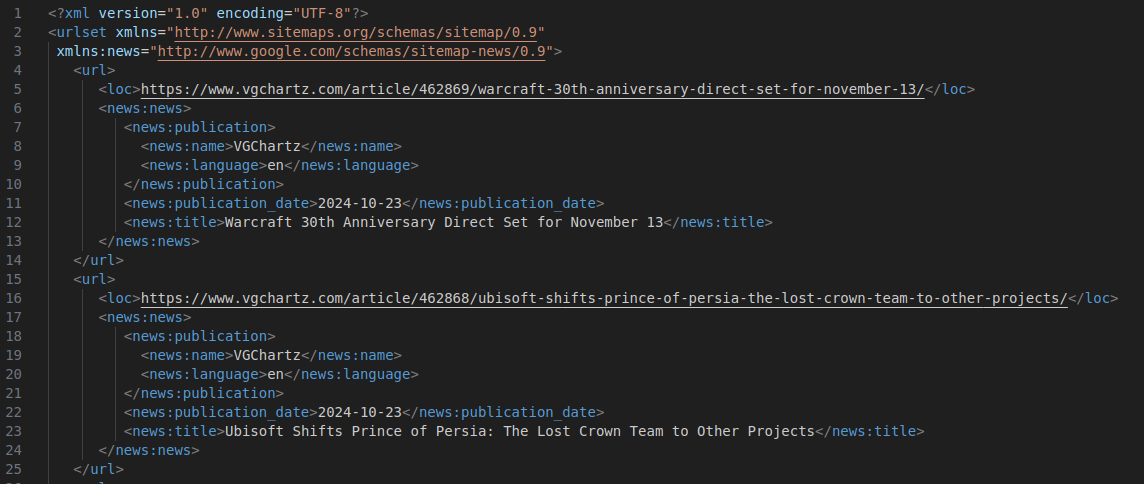

Un análisis con herramientas especializadas como [xml-sitemaps](www.xml-sitemaps.com).com revela que VGchartz alberga un volumen considerablemente mayor a 500 páginas.  Dado que el sitio web se basa en PHP para generar contenido dinámico, la información no se encuentra embebida directamente en el código HTML, sino que se obtiene mediante consultas a una base de datos subyacente.  Esta arquitectura dinámica permite estructurar el sitio en directorios principales que despliegan resultados variables en función de los atributos consultados en la base de datos, como se ilustra en la captura adjunta.

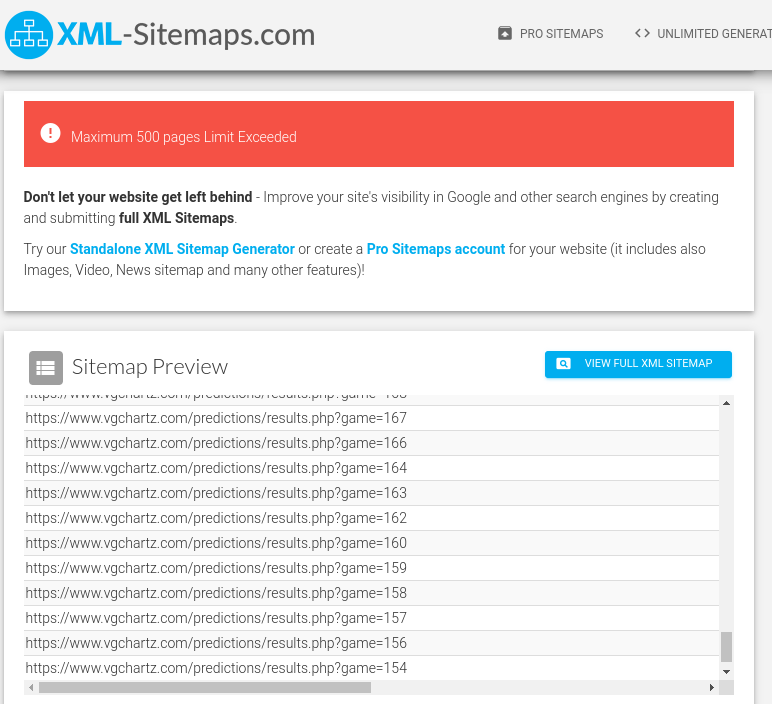

El análisis realizado con las herramientas de desarrollo del navegador (Dev Tools), específicamente la pestaña "Red" con el filtro `XHR/Fetch` activado, revela la naturaleza dinámica de la generación de contenido en este sitio web.   

Como se observa en la captura adjunta, se realizan múltiples peticiones asíncronas a archivos PHP, como *outgamescore.php* y *gamerelatednews.php*.  Estas peticiones, características de las interacciones con bases de datos en sitios web dinámicos, sugieren que el contenido visible en la página no se encuentra estático en el código HTML, sino que se obtiene y renderiza bajo demanda mediante consultas a la base de datos subyacente.

Al inspeccionar los detalles de cada petición, podemos observar información crucial como:

- Método de la petición: Predominantemente GET, lo que indica que se están solicitando datos del servidor.
- Cabeceras HTTP: Revelan información sobre el tipo de contenido solicitado y la configuración de la comunicación cliente-servidor.
- Parámetros de la petición: Estos parámetros, enviados como parte de la URL o en el cuerpo de la petición, especifican los criterios de la consulta a la base de datos, determinando así la información que se recupera.
- Respuesta del servidor: Contiene los datos solicitados, generalmente en formatos como JSON o XML, que posteriormente son procesados por JavaScript para actualizar el contenido de la página dinámicamente.

Todo esto confirma que la arquitectura del sitio web se basa en la interacción dinámica con una base de datos para servir contenido personalizado y actualizado. Ello que implica un desafío adicional para el web scraping, ya que la información no está disponible directamente en el código fuente HTML.

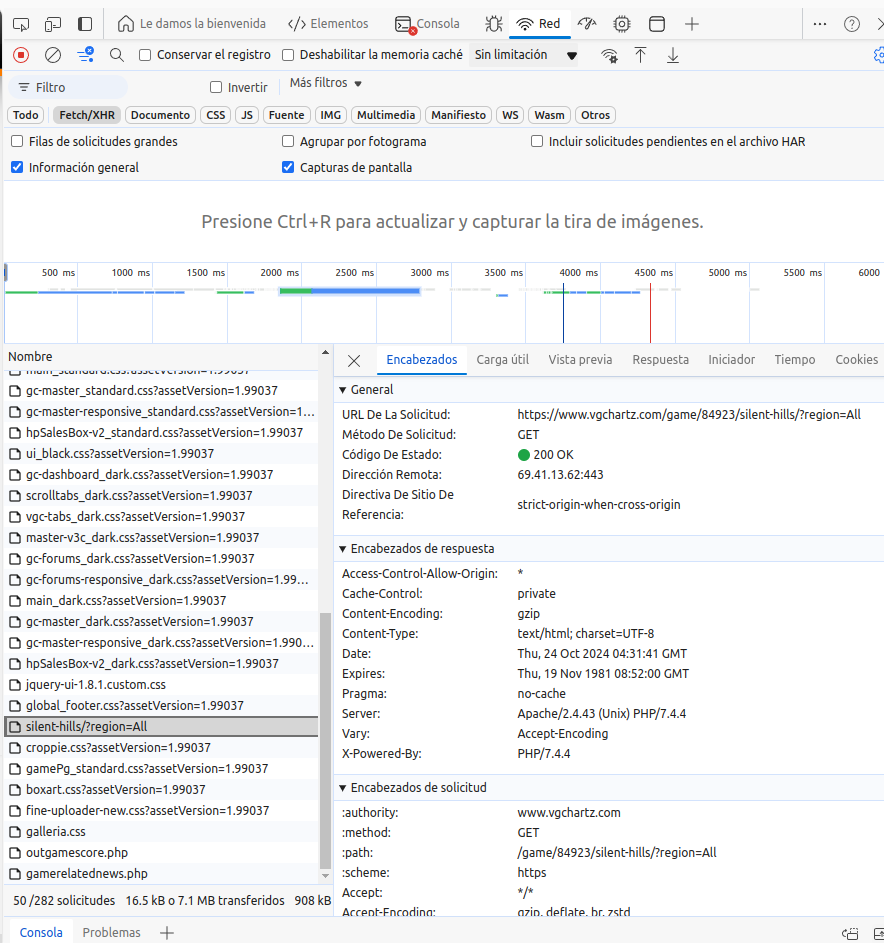

Respecto al tamaño, empleando 'site:www.vgchartz.com' en el buscador Google.com, observamos que figuran 175.000 resultados. Es decir, el sitio web tiene en la actualidad en torno a 175 mil páginas, como puede observarse en la captura.

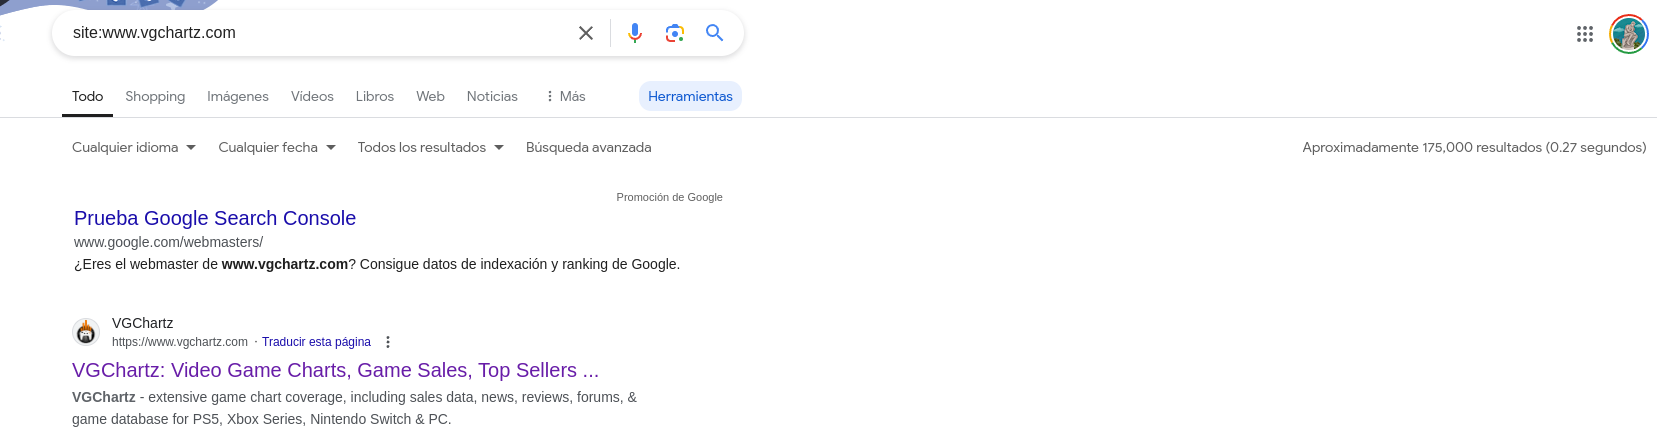

Asimismo, para obtener información sobre las tecnologías utilizadas en www.vgchartz.com y aunque de antemano ya sabemos que se trata de un sitio web que emplea `PHP`, emplearemos la libreria de Python `builtwith`:

In [ ]:
# instalamos la libreria
!pip install builtwith

# Importamos las librerias
import builtwith
import pprint

# Creamos un diccionario para guardar los resultados
informacion = builtwith.parse('https://www.vgchartz.com')

# Imprimimos la informacion con pprint
pprint.pprint(informacion)

{'analytics': ['comScore'],
 'javascript-frameworks': ['jQuery'],
 'operating-systems': ['UNIX'],
 'programming-languages': ['PHP'],
 'web-frameworks': ['Twitter Bootstrap'],
 'web-servers': ['Apache']}


El análisis realizado con la librería builtwith de Python revela las siguientes tecnologías empleadas en la construcción de VGChartz:

- Lenguaje de programación principal: PHP. Esto confirma que el sitio web genera contenido dinámico, lo que implica que la información relevante probablemente se obtendrá mediante peticiones a una base de datos y no estará directamente disponible en el código HTML.
- Framework de JavaScript: jQuery. Este framework facilita la manipulación del DOM y la realización de peticiones AJAX, lo que va en la linea de que el sitio web utiliza AJAX para cargar contenido dinámico sin necesidad de recargar la página.
- Framework web: Twitter Bootstrap. Este framework proporciona estilos CSS y componentes JavaScript predefinidos para crear interfaces web responsive. Aunque no afecta directamente al web scraping, es importante tenerlo en cuenta para identificar correctamente los elementos HTML que contienen la información de interés.
- Servidor web: Apache. Este servidor web es uno de los más populares y no presenta desafíos específicos para el web scraping.
- Sistema operativo del servidor: UNIX. Esta información no tiene un impacto directo en el web scraping.
- Analítica web: comScore. Esta herramienta de analítica web no interfiere con el web scraping.

**Implicaciones para el web scraping:**

- Contenido dinámico: La utilización de PHP y jQuery indica que el sitio web genera contenido dinámico, lo que requerirá el uso de técnicas de web scraping que permitan manejar la renderización de JavaScript y la extracción de datos de peticiones AJAX.
- Posibles medidas anti-scraping: Aunque el archivo robots.txt es permisivo, es posible que el sitio web implemente otras medidas anti-scraping, como la detección de patrones de acceso o el bloqueo de IPs. Seria necesario monitorear el comportamiento del sitio web durante el proceso de scraping para detectar y evitar posibles bloqueos.
- Inspección del código fuente: Como mantuvimos anteriormente, parece vital inspeccionar el código fuente de las páginas para comprender cómo se estructura la información y cómo se cargan los datos dinámicos. Esto ayudaria a identificar los selectores CSS o XPath necesarios para extraer la información en caso emplear `Scrapy` en Python o librerias análogas.

Finalmente, vamos a realizar un `whois` para conocer al propietario, de figurar esta información:

In [ ]:
# cargamos la libreria en el sistema
!pip3 install python-whois

# Importamos la libreria 'whois'
import whois

# Realizamos el query
pprint.pprint(whois.whois('https://www.vgchartz.com'))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.1 MB/s eta 0:00:00
{'address': None,
 'city': None,
 'country': None,
 'creation_date': datetime.datetime(2007, 1, 29, 10, 10, 19),
 'dnssec': 'unsigned',
 'domain_name': 'VGCHARTZ.COM',
 'emails': None,
 'expiration_date': datetime.datetime(2026, 1, 29, 10, 10, 19),
 'name': None,
 'name_servers': ['NS1.MICHONLINE.NET', 'NS3.VGCHARTZ.COM'],
 'org': None,
 'referral_url': None,
 'registrant_postal_code': None,
 'registrar': '123-Reg Limited',
 'state': None,
 'status': ['clientDeleteProhibited '
            'https://icann.org/epp#clientDeleteProhibited',
            'clientTransferProhibited '
            'https://icann.org/epp#clientTransferProhibited',
            'clientUpdateProhibited '
            'https://icann.org/epp#clientUpdateProhibited'],
 'updated_date': datetime.datetime(2019, 1, 23, 20, 0, 51),
 'whois_server': 'whois.123-reg.co.uk'}


Los resultados de la consulta WHOIS de VGChartz proporcionan información interesante sobre el registro y la propiedad del dominio, aunque no revelan detalles técnicos que afecten directamente al web scraping.  No obstante, algunos puntos pueden ser relevantes para contextualizar el análisis

**Aspectos a destacar:**

- Fecha de creación: El dominio se registró en 2007, lo que indica que se trata de un sitio web establecido con una larga trayectoria. Cabria pensar en una estructura de código más compleja y la posible implementación de medidas anti-scraping a lo largo del tiempo.
- Fecha de expiración: El dominio expira en 2026, lo que significa que el sitio web está activo y se espera que continúe operando en el futuro previsible.
- Registrar: El dominio está registrado con 123-Reg Limited, un registrador de dominios conocido.
- Estado del dominio: El estado del dominio muestra varias restricciones, como la prohibición de eliminación, transferencia y actualización por parte del cliente. Estas son comunes para proteger el dominio de acciones no autorizadas.
- Servidores de nombres: Se utilizan dos servidores de nombres, uno de ellos (NS3.VGCHARTZ.COM) específico del sitio web. Esto seria un indicativo de una infraestructura de servidor dedicada y podria incidir en nuestro trabajo.



A continuacion vamos a realizar un intento sencillo de web scraping empleando las librerias `requests` y `BeautifulSoup4`:

In [ ]:
# Instalamos 'requests'
!pip install requests
# Instalamos 'BeatufulSoup4'
!pip3 install beautifulsoup4

# importamos 'requests' y 'BeautifulSoup'
import requests
from bs4 import BeautifulSoup

A continuación, empleando `requests` observamos el codigo `HTTP` de respuesta y el contenido en bruto:

In [ ]:
url: str = ("https://www.vgchartz.com/")
sitio = requests.get(url)
print("El codigo HTTP:", sitio.status_code)
print("El contenido de la pagina en bruto:")
# pprint.pprint(sitio.content)
# Evito usar esta ultima linea por su verbosidad

El codigo HTTP: 200
El contenido de la pagina en bruto:


In [ ]:
# Parseamos el contenido con 'BeatifulSop'
vgchartz_parsed = BeautifulSoup(sitio.content)
# Imprimimos el contenido de forma legible con la funcion `prettify`:
print(vgchartz_parsed.prettify())

<!DOCTYPE html>
<html dir="LTR" id="XF" itemscope="" lang="en-US">
 <head>
  <title>
   Video Game Charts, Game Sales, Top Sellers, Game Data - VGChartz
  </title>
  <base href="https://www.vgchartz.com/"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="user-scalable=no, width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="upgrade-insecure-requests" http-equiv="Content-Security-Policy"/>
  <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
  <link href="https://www.vgchartz.com" rel="canonical"/>
  <link href="https://www.vgchartz.com/favicons/apple-touch-icon.png?v=2bBk5raKpY" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://www.vgchartz.com/favicons/favicon-32x32.png?v=2bBk5raKpY" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://www.vg

#### Conclusiones del Análisis preliminar de VGChartz para Web Scraping

El presente análisis tuvo como objetivo evaluar la factibilidad y los desafíos de realizar web scraping en el sitio web VGChartz ([www.vgchartz.com](https://www.vgchartz.com)). Para ello, se ha llevado a cabo una inspección preliminar utilizando diversas herramientas y técnicas de análisis.

**Análisis de tecnologías:**

Mediante la librería `builtwith` de Python, se ha identificado que VGChartz utiliza PHP como lenguaje de programación principal, lo que indica una generación dinámica de contenido.  Esto implica que la información de interés no estará embebida directamente en el código HTML, sino que se obtendrá a través de peticiones a una base de datos subyacente. La presencia de jQuery como framework de JavaScript refuerza esta hipótesis, ya que facilita la implementación de peticiones AJAX para la carga dinámica de contenido.

**Inspección de la actividad de red:**

Un análisis de la actividad de red con las herramientas de desarrollo del navegador, específicamente la pestaña "Red" con el filtro "XHR/Fetch" activado, confirma la naturaleza dinámica del sitio web.  Se observan múltiples peticiones asíncronas a archivos PHP, como `outgamescore.php` y `gamerelatednews.php`, que sugieren la interacción con la base de datos para obtener y renderizar la información en la página.

**Tamaño del sitio web:**  

El análisis del sitio web nos permite vislumbrar que este es un sitio web masivo en cuanto a numero de paginas, 175.000 lo que supone un reto añadido al reto que supone en sí mismo el stack empleado.

**Análisis del archivo robots.txt:**

El archivo robots.txt de VGChartz se muestra permisivo, permitiendo el acceso a todas las secciones del sitio web.  Sin embargo, esto no descarta la posible implementación de otras medidas anti-scraping, como la detección de patrones de acceso o el bloqueo de IPs.

**Información WHOIS:**

La consulta WHOIS revela que el dominio VGChartz se registró en 2007, lo que sugiere una larga trayectoria y una posible complejidad en la estructura del código.  Si bien la información WHOIS no aporta detalles técnicos relevantes para el web scraping, contextualiza la antigüedad del sitio web y su gestión.

**Consideraciones para el web scraping:**

* **Contenido dinámico:** La utilización de PHP y jQuery implica la necesidad de emplear técnicas de web scraping que manejen la renderización de JavaScript y la extracción de datos de peticiones AJAX.  Herramientas como Scrapy, con capacidad para procesar JavaScript y simular la interacción del usuario, serian inevitables en este trabajo.
* **Posibles medidas anti-scraping:**  A pesar de la permisividad del archivo robots.txt, se debe considerar la posibilidad de encontrar medidas anti-scraping.  Será necesario monitorear el comportamiento del sitio durante el scraping y adaptar la estrategia en consecuencia.
* **Inspección del código fuente:**  Un análisis detallado del código fuente de las páginas será fundamental para comprender la estructura de la información y la forma en que se cargan los datos dinámicos.  Esto permitiria identificar los selectores `CSS` o `XPath` empleados en la extracción de datos dependiendo de la libreria a emplear, enfasis con `Scrapy`.

### PRICE charting

PRICE charting tiene activo el [sitemap](https://www.pricecharting.com/sitemap.xml) que permitiria afinar el código para realizar el scraping solo sobre las páginas relevantes para el proyecto.

El acceso al [sitemap](https://www.pricecharting.com/sitemap.xml) de Pricecharting (existente) facilitaria eventualmente la optimización del web scraping.  Este mapa del sitio web proporciona una lista estructurada de las URLs relevantes, permitiendo codificar el scraper enfocarse en las páginas que contienen la información de interés y evitando el rastreo innecesario de secciones irrelevantes.

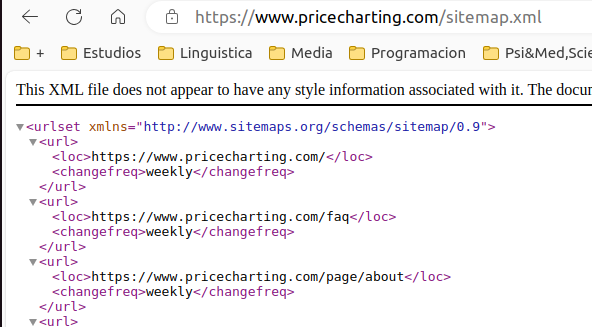

La inspección de Pricecharting con las herramientas de desarrollo del navegador (Dev Tools) revelan un comportamiento distinto al observado en VGChartz en cuanto a la carga de la información de precios.   

A diferencia de VGChartz, que empleaba peticiones `XHR/Fetch` a archivos `PHP` para obtener datos de forma asíncrona, en Pricecharting no aparecen dichas peticiones en la pestaña "Red".

Esto sugiere la posibilidad de que Pricecharting utilice un enfoque de renderizado distinto para la presentación de la información de precios.   

Entre las posibilidades se encuentra que:

- Renderizado del lado del servidor (SSR): Pricecharting podría estar generando el código HTML completo, incluyendo la información de precios, en el servidor antes de enviarlo al navegador. En este caso, no se requerirían peticiones AJAX adicionales para obtener los datos, ya que estarían disponibles desde la carga inicial de la página.
- JavaScript embebido: La información de precios podría estar presente en el código HTML, ya sea incrustada en etiquetas HTML o como atributos de datos en elementos HTML. El JavaScript de la página se encargaría de procesar y mostrar la información sin necesidad de realizar peticiones adicionales al servidor. **Esta parece la más plausible.**
- WebSockets: Aunque menos probable en este contexto, no se descarta la posibilidad de que Pricecharting utilice WebSockets para la comunicación en tiempo real con el servidor. Esta tecnología permitiría la actualización dinámica de la información de precios sin recargar la página ni recurrir a peticiones AJAX tradicionales.

Para determinar con precisión el mecanismo de renderizado empleado, seria necesario:

1. Inspección del código fuente: Un análisis minucioso del código fuente permitirá identificar la ubicación de la información de precios dentro del HTML. La presencia de patrones o estructuras específicas ayudará a comprender cómo se almacenan y organizan los datos.
2. Análisis del código JavaScript: Examinar el código JavaScript de la página será crucial para comprender cómo se procesa y se muestra la información de precios. Se buscarán variables o funciones que manejen los datos y se analizará su lógica.
3. Utilización de puntos de interrupción: En caso de que la información de precios se genere o manipule dinámicamente con JavaScript, se utilizarán puntos de interrupción en las Dev Tools para detener la ejecución del código en momentos específicos y examinar el estado de las variables.

- **Consideración de herramientas adicionales:**  
Si las Dev Tools no proporcionan suficiente información, se recurria a herramientas como Charles Proxy o Wireshark para interceptar el tráfico de red y analizar las comunicaciones entre el navegador y el servidor.


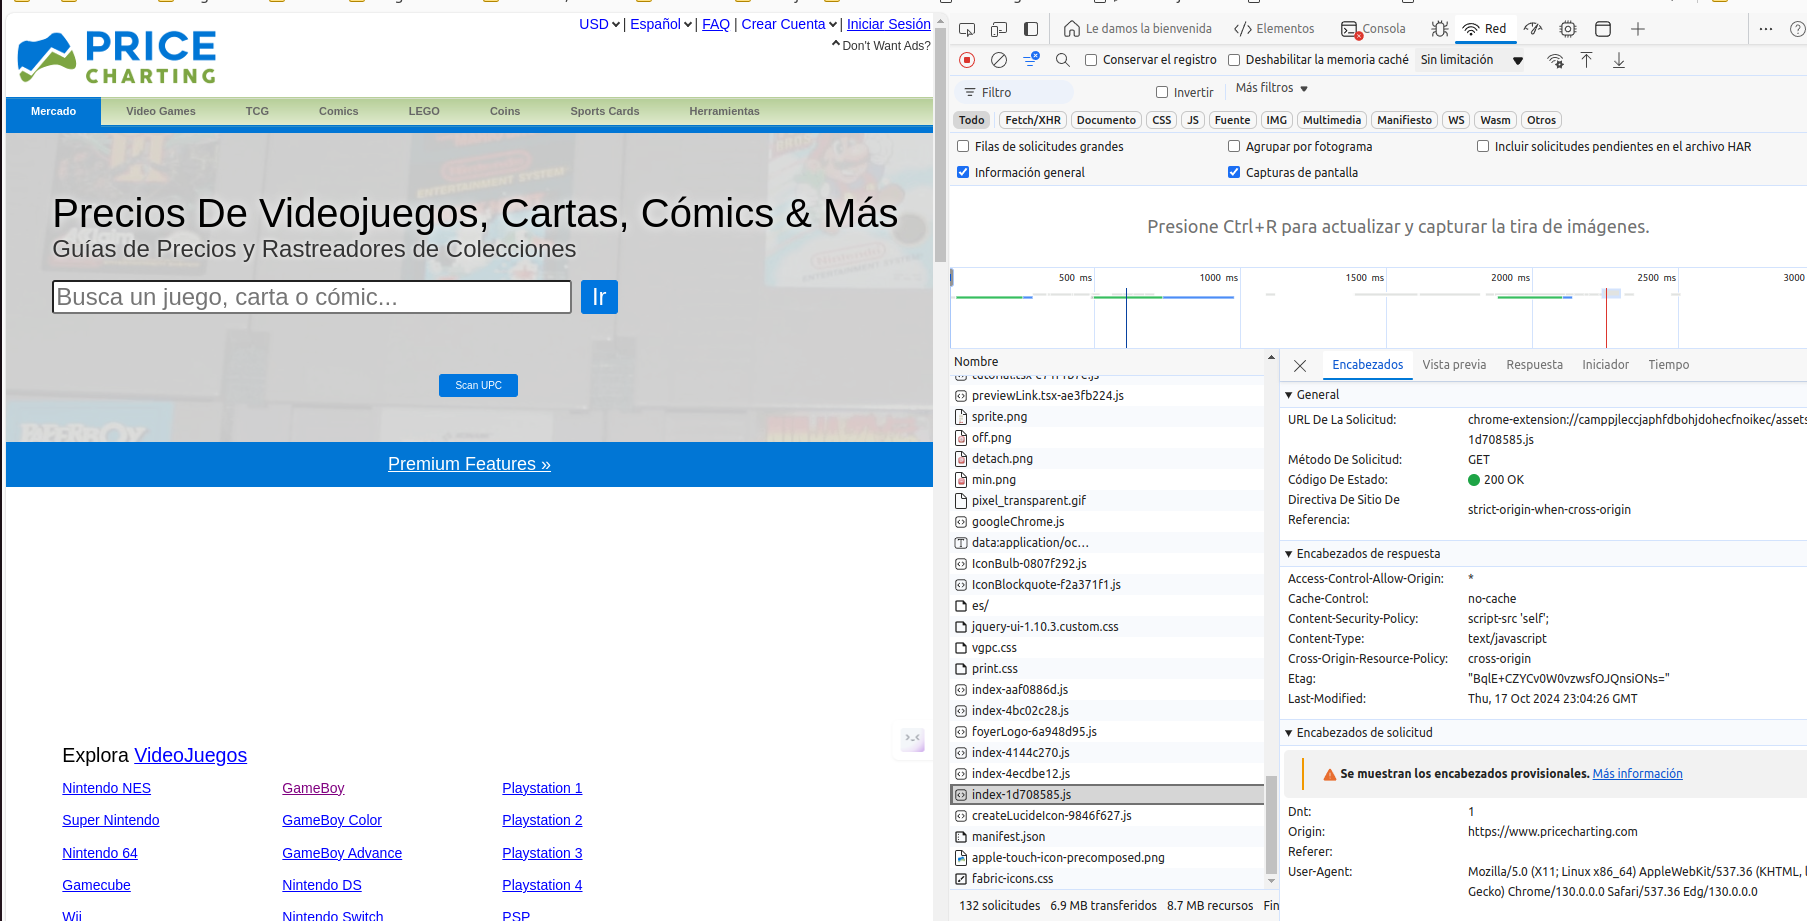


Respecto al tamaño, empleando 'site:https://www.pricecharting.com/es/' en el buscador y como puede observarse, obtenemos que este sitio web tiene aproximadamente, **183.000 paginas**.

<div style="width: 100%; clear: both;">
    <div style="float: center; width: 50%;">
       <img src="https://syw.under.jp/img/gl_site_Pchart.png", align="center">
    </div>
</div>

Asimismo, para obtener información sobre las tecnologías utilizadas en https://www.pricecharting.com/es/ , empleando la libreria de Python `builtwith`:

In [ ]:
# instalamos la libreria dependiendo
# del servidor de desarrollo y sus reinicios
!pip install builtwith

# Importamos las librerias
import builtwith
import pprint

# Creamos un diccionario para guardar los resultados
informacion_sitio = builtwith.parse('https://www.pricecharting.com/')

# Imprimimos la informacion con pprint
pprint.pprint(informacion_sitio)

  Preparing metadata (setup.py) ... done
  Created wheel for builtwith: filename=builtwith-1.3.4-py3-none-any.whl size=36079 sha256=e06177c011c92a27c2567d4875c844156276e14e815907b2d7ac074640dd83cd
  Stored in directory: /root/.cache/pip/wheels/6e/bf/03/4e45fb3049b99c21360499dfdad979d11b73e972fb2d3ad56c
Successfully built builtwith
{'javascript-frameworks': ['jQuery', 'jQuery UI'],
 'web-servers': ['Google App Engine']}


Pricecharting está alojado en Google App Engine y utiliza tecnologias Javascript para mostrar contenidos sin necesidad de recargar la pagina.  
Esto tiene varias connotaciones para el web scraping, algunas positivas y otras que podrían presentar desafíos.

**Posibles ventajas:**

- Escalabilidad y rendimiento: Google App Engine está diseñado para escalar automáticamente en función del tráfico, lo que significa que el sitio web debería ser capaz de manejar un gran número de peticiones sin problemas de rendimiento.
- Infraestructura robusta: Google App Engine ofrece una infraestructura seria de alta disponibilidad y protección contra ataques DDoS. Ello conlleva implicitamente que el sitio web debería estar accesible sin problemas, lo que facilitaria el web scraping continuo.
- Posible uso de APIs: Google App Engine facilita la creación y el despliegue de APIs. Pricecharting ofrece una API para acceder a los datos pero que afectos de esta practica, no podremos utilizar

**Probables desafíos:**  

- Protección contra web scraping: Google App Engine ofrece herramientas y servicios para proteger las aplicaciones contra el web scraping, como la detección de patrones de acceso, el bloqueo de IPs y la integración con reCAPTCHA. No cabe duda de que Pricecharting podría estar utilizando algunas de estas medidas, lo que dificultaria el trabajo.
- Limitaciones de acceso: Google App Engine puede imponer limitaciones en el número de peticiones que se pueden realizar a una aplicación, especialmente teniendo en cuenta que tiene API.
Al poseer una API de pago, es muy probable que el intento de web scrap finalice en resultados limitados, como puede observarse en la captura al pie.

<figure style="width: 100%; clear: both;">
    <div style="display: flex; justify-content: center; width: 50%;">
       <img src="https://syw.under.jp/img/pricechart_api.png" align="center">
    </div>
    <figcaption><i>Limitaciones de acceso a la API de Pricecharting</i>.</figcaption>
</figure>


- Cambios en la infraestructura: Google suele implementar cambios en las condiciones e infraestructuras, afectando al web scraping. Aunque solo necesitamos realizar puntualmente Scraping para esta practica, en un contexto laboral, en un futuro, el diseño del Scraper podria quedar inservible

Vamos a realizar un `whois` para conocer al propietario y otros detalles, de figurar esta información:

In [ ]:
# cargamos la libreria en el sistema
!pip3 install python-whois

# Importamos la libreria 'whois'
import whois

# Realizamos el query
pprint.pprint(whois.whois('https://www.pricecharting.com/'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.5 MB/s eta 0:00:00
{'address': 'REDACTED FOR PRIVACY',
 'city': 'REDACTED FOR PRIVACY',
 'country': 'US',
 'creation_date': datetime.datetime(2010, 7, 23, 19, 18, 48),
 'dnssec': 'unsigned',
 'domain_name': ['PRICECHARTING.COM', 'pricecharting.com'],
 'emails': 'abuse-complaints@squarespace.com',
 'expiration_date': datetime.datetime(2025, 7, 23, 19, 18, 48),
 'name': 'REDACTED FOR PRIVACY',
 'name_servers': ['NS-CLOUD-B1.GOOGLEDOMAINS.COM',
                  'NS-CLOUD-B2.GOOGLEDOMAINS.COM',
                  'NS-CLOUD-B3.GOOGLEDOMAINS.COM',
                  'NS-CLOUD-B4.GOOGLEDOMAINS.COM',
                  'ns-cloud-b3.googledomains.com',
                  'ns-cloud-b4.googledomains.com',
                  'ns-cloud-b1.googledomains.com',
                  'ns-cloud-b2.googledomains.com'],
 'org': 'Video Game Price Charts, LLC',
 'referral_url': None,
 'registrant_postal_code': 'REDACTED FOR PRIVACY',
 'registrar': 'Square

La consulta WHOIS realizada sobre el dominio pricecharting.com, utilizando la librería whois de Python, proporciona información relevante sobre el sitio web, aunque no aporta detalles técnicos que tengan una importancia diferencial en la estrategia de web scraping.

**Información relevante:**

- Fecha de creación: El dominio se registró en julio de 2010. Ello supone una presencia establecida en la web. Si bien no es un factor determinante, la antigüedad del sitio web podría sugerir una mayor complejidad en su estructura y la posible implementación de medidas anti-scraping a lo largo del tiempo.
- Fecha de expiración: El dominio expira en julio de 2025, confirmando la continuidad de las operaciones del sitio.
Organización: El dominio está registrado a nombre de "Video Game - Price Charts, LLC", una entidad.
- Registrador: El registrador del dominio es 'Squarespace Domains II LLC'.
- Servidores de nombres: Se observa el uso de servidores de nombres de Google Domains, lo que podría estar relacionado con el alojamiento del sitio web en Google App Engine.
- Estado del dominio: El estado del dominio incluye restricciones como la prohibición de eliminación y transferencia por parte del cliente, medidas de seguridad comunes para proteger la propiedad del dominio.

**Implicaciones para el web scraping:**

Aunque la información reseñada no proporciona detalles técnicos sobre la tecnología del sitio web, algunos aspectos pueden ser relevantes:

- Antigüedad: La trayectoria de Pricecharting sugiere la posibilidad de que se hayan implementado medidas anti-scraping a lo largo del tiempo.
- Infraestructura del servidor: El uso de servidores de nombres de Google Domains indica una infraestructura robusta y escalable, lo influye en la velocidad y capacidad de respuesta del servidor y manejar múltiples peticiones HTTPS.

 Seguidamente y en la linea que seguimos anterioremente, vamos a realizar un intento sencillo de web scraping empleando las librerias `requests` y `BeautifulSoup4`:

In [ ]:
# Instalamos 'requests'
!pip install requests
# Instalamos 'BeatufulSoup4'
!pip3 install beautifulsoup4

# importamos 'requests' y 'BeautifulSoup'
import requests
from bs4 import BeautifulSoup

In [ ]:
url: str = ("https://www.pricecharting.com/es/category/video-games")
sitio = requests.get(url)
print("El codigo HTTP:", sitio.status_code)
print("El contenido de la pagina en bruto:")
# pprint.pprint(sitio.content)
# Evito usar esta ultima linea por su verbosidad

El codigo HTTP: 200
El contenido de la pagina en bruto:


El código 200 nos indica que se ha producido la respuesta a la peticion HTTP. Continuamos analizando el contenido de la página

In [ ]:
# Parseamos el contenido con 'BeatifulSop'
price_chart_parsed = BeautifulSoup(sitio.content)
# Imprimimos el contenido de forma legible con la funcion `prettify`:
print(price_chart_parsed.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Precios de Video Juegos | PriceCharting
  </title>
  <meta content="PriceCharting" name="application-name"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="app-id=6452190948" name="apple-itunes-app"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <link href="/css-longterm/jquery-ui-1.10.3.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/css/vgpc.css" rel="stylesheet" type="text/css"/>
  <link href="/css-longterm/print.css" media="print" rel="stylesheet" type="text/css"/>
  <style>
   a#logo {
                background:center no-repeat url('/images/logo-pricecharting-new.png');
                width:200px;
            }
            @media screen and (max-width:1100px) {
                a#logo {
                    padding-top: 25px;
                    margin-bottom: 20px;
                

Observamos que la sub pagina de Pricecharting.com referida a video juegos en Español nos proporciona los enlaces a los videojuegos clasificados por sistemas como puede observarse en el codigo HTML:


```
<ul>
        <li>
         <a href="/es/console/xbox" title="Xbox">
          Xbox
         </a>
        </li>
        <li>
         <a href="/es/console/sega-genesis" title="Sega Genesis">
          Sega Genesis
         </a>
        </li>
        <li>
         <a href="/es/console/xbox-one" title="Xbox One">
          Xbox One
         </a>
        </li>
        [...]
</ul>

```

Si scrapeamos una muestra concreta como ejemplo empleando un enlace a videojuegos de Plastation One (https://www.pricecharting.com/es/console/playstation), observaremos que los precios estan referenciados en el mismo codigo HTML:

In [ ]:
# Instalamos 'requests'
!pip install requests
# Instalamos 'BeatufulSoup4'
!pip3 install beautifulsoup4

# importamos 'requests' y 'BeautifulSoup'
import requests
from bs4 import BeautifulSoup
url: str = ("https://www.pricecharting.com/es/console/playstation")
sitio = requests.get(url)
print("El codigo HTTP:", sitio.status_code)
# print("El contenido de la pagina en bruto:")
# pprint.pprint(sitio.content)
# Evito usar esta ultima linea por su verbosidad

El codigo HTTP: 200


In [ ]:
# Parseamos el contenido con 'BeatifulSop'
price_chart_parsed = BeautifulSoup(sitio.content)
# Imprimimos el contenido de forma legible con la funcion `prettify`:
print(price_chart_parsed.prettify())

<!DOCTYPE html>
<html lang="es">
 <head>
  <title>
   Precios y valores de Playstation | Todos los juegos de PS1 con precios
  </title>
  <meta content="PriceCharting" name="application-name"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="app-id=6452190948" name="apple-itunes-app"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <link href="/css-longterm/jquery-ui-1.10.3.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/css/vgpc.css" rel="stylesheet" type="text/css"/>
  <link href="/css-longterm/print.css" media="print" rel="stylesheet" type="text/css"/>
  <style>
   a#logo {
                background:center no-repeat url('/images/logo-pricecharting-new.png');
                width:200px;
            }
            @media screen and (max-width:1100px) {
                a#logo {
                    padding-top: 25px;
                    margin

Observamos que efectivamente el precio está contenido en el propio HTML:

```
<td class="title" title="4280">
           <a href="/es/game/playstation/breath-of-fire-3">
            Breath of Fire 3
           </a>
          </td>
          <td class="price numeric used_price">
           <span class="js-price">
            $43.24
           </span>
          </td>
          <td class="price numeric cib_price">
           <span class="js-price">
            $68.84
           </span>
          </td>
          <td class="price numeric new_price">
           <span class="js-price">
            $322.82
           </span>
          </td>
```



Pero asimismo detectamos un problema adicional, pues como es lógico, el sitio web implementa técnicas de "lazy load" y carga los resultados progresivamente a medida que el usuario hace scroll en la pagina que muestra en los resultados utilizando un script como puede observarse en el código:

```
 <form method="POST" action="" class="next_page js-next-page">
                        <input type="hidden" name="sort" value="" />
```
Este fragmento de código revela que la página utiliza JavaScript para cargar contenido dinámicamente a medida que el usuario interactúa con ella (en este caso, al hacer scroll). Esto implica que, si simplemente descargamos el HTML inicial con `urllib`, solo obtendremos una parte de los datos, ya que el resto se carga posteriormente mediante JavaScript.

Para solucionar esto, emplearemos Selenium, una herramienta que nos permite automatizar un navegador web. Con Selenium, podemos controlar un navegador real (como Chrome o Firefox) a través de nuestro código Python. Esto nos permitirá:

Cargar la página web: Abrir la página de Pricecharting en el navegador controlado por Selenium.
Simular la interacción del usuario: Hacer scroll en la página para que se carguen todos los videojuegos, tal como lo haría un usuario real.
Esperar a que se cargue el contenido: Asegurarnos de que todo el contenido dinámico se haya cargado completamente antes de extraer la información.
Obtener el HTML completo: Acceder al código HTML de la página después de que se haya cargado todo el contenido dinámico.
Extraer la información: Utilizar Beautiful Soup para analizar el HTML completo y extraer los datos que necesitamos (nombre del videojuego, precio, etc.).
En resumen, Selenium nos permite superar la limitación del "lazy load" al simular la interacción de un usuario real con la página web, lo que nos permite acceder a la totalidad de los datos.



El análisis preliminar de Pricecharting.com, llevado a cabo con el objetivo de evaluar la factibilidad y los desafíos del web scraping, ha revelado información vital sobre la arquitectura del sitio web y las tecnologías que lo componen.

**Principales hallazgos:**

* **Contenido dinámico generado con JavaScript:**  Pricecharting.com utiliza JavaScript embebido para generar el contenido de la página de forma dinámica, incluyendo la información de precios.  Esto implica la necesidad de emplear técnicas de web scraping que permitan la ejecución de JavaScript y la extracción de datos del DOM.
* **Ausencia de peticiones XHR/Fetch:**  A diferencia de otros sitios web analizados, Pricecharting.com no realiza peticiones XHR/Fetch evidentes para obtener la información de precios.  Esto sugiere un enfoque de renderizado del lado del servidor (SSR) o la inclusión de los datos directamente en el código HTML, lo que podría simplificar el proceso de web scraping.
* **Alojamiento en Google App Engine:**  El sitio web está alojado en Google App Engine, lo que ofrece ventajas en cuanto a escalabilidad, rendimiento e infraestructura.  Sin embargo,plantea desafíos en términos de posibles medidas anti-scraping y limitaciones de acceso.
* **API comercial:**  Pricecharting.com ofrece una API para acceder a sus datos, pero su naturaleza comercial y las restricciones de uso (sin olvidar las condiciones de la PR) la descartan como una alternativa viable para este proyecto.
* **Sitemap disponible:**  El sitio web proporciona un sitemap que facilita la identificación de las URLs relevantes para el proyecto, permitiendo optimizar el proceso de web scraping.

**Implicaciones para el web scraping:**

* **Renderización de JavaScript:**  Se requerirá un scraper capaz de ejecutar JavaScript para acceder a la información de precios.  Herramientas como Scrapy, en combinación con middlewares como `scrapy-splash` o `scrapy-selenium`, serán esenciales para este propósito.
* **Análisis del código fuente:**  Un análisis exhaustivo del código fuente permitirá identificar la ubicación y la estructura de la información de precios, así como la lógica del código JavaScript que la gestiona.
* **Consideración de medidas anti-scraping:**  Se debe tener en cuenta la posibilidad de que Pricecharting.com implemente medidas anti-scraping, como la detección de patrones de acceso o el bloqueo de IPs.  Se recomienda el uso de proxies y la rotación de agentes de usuario para minimizar el riesgo de bloqueo.
* **Respeto a las limitaciones de acceso:**  Es crucial respetar las limitaciones de acceso que pueda imponer Google App Engine o el propio sitio web.  Se debe evitar sobrecargar el servidor con peticiones y utilizar técnicas de web scraping éticas y responsables.

Todo parece indicar por tanto que aunque el web scraping es factible, aunque complejo. Requeriria una estrategia que contemplase la naturaleza dinámica del sitio web, su alojamiento en Google App Engine y las posibles limitaciones de acceso.  

La utilización de herramientas adecuadas, el análisis del código fuente y el respeto a las buenas prácticas de web scraping devienen claves.


#### Conclusiones del Análisis Preliminar de Pricecharting.com para Web Scraping

El análisis preliminar de Pricecharting.com, llevado a cabo con el objetivo de evaluar la factibilidad y los desafíos del web scraping, ha desvelado información clave sobre la arquitectura del sitio web y las tecnologías que lo componen.  

A continuación, detallamos los principales hallazgos y sus implicaciones para el proceso de web scraping:

**Hallazgos principales:**

*   **Contenido dinámico y "Lazy Load":**  Pricecharting.com utiliza JavaScript para generar contenido dinámico, incluyendo la información de precios. Además, implementa "lazy load", cargando los datos de los videojuegos a medida que el usuario hace scroll en la página. Esto requiere una solución de web scraping que pueda ejecutar JavaScript y simular la interacción del usuario para obtener la información completa.
*   **Ausencia de peticiones XHR/Fetch:** No se observan peticiones XHR/Fetch para obtener la información de precios, lo que sugería un enfoque de renderizado del lado del servidor (SSR) o la inclusión de los datos directamente en el HTML, como hemos podido comprobar.
*   **Alojamiento en Google App Engine:** El sitio web está alojado en Google App Engine, lo que puede implicar la presencia de medidas anti-scraping y limitaciones de acceso, aunque en las pruebas realizadas no hayan surgido problemas técnicos.
*   **API comercial:**  Pricecharting.com ofrece una API comercial, pero queda descartada para este proyecto debido a restricciones del ejercicio.
*   **Sitemap disponible:** El sitio web proporciona un sitemap, que podría ser útil para identificar las URLs principales, pero no para la extracción completa de datos debido al "lazy load".

**Implicaciones para el Web Scraping:**

*   **Automatización del navegador:**  Se requiere una herramienta que permita automatizar un navegador web para manejar el contenido dinámico y el "lazy load". **Selenium**, en combinación con un webdriver, sería fundamental para este propósito.
*   **Análisis del código fuente:**  El análisis del código fuente ha permitido identificar la estructura de la información y la lógica del uso del código JavaScript.
*   **Consideración de medidas anti-scraping:**  La presencia de medidas anti-scraping y uso de técnicas para evitar el bloqueo, como proxies y rotación de user-agents no queda descartado
*   **Respeto a las limitaciones de acceso:**  Es fundamental respetar las limitaciones de acceso y utilizar técnicas de web scraping éticas y responsables.


## Conclusiones preliminares:

El web scraping de Pricecharting.com es factible, pero presenta desafíos debido al contenido dinámico y al "lazy load". Una estrategia de web scraping debera considerar utilizar Selenium para la automatización del navegador y Beautiful Soup para el análisis del HTML.  El análisis del código fuente y el respeto a las buenas prácticas de web scraping son cruciales para el éxito de cualquier proyecto de scraping y este caso no es una excepción.


## Enfoque y nombre para el trabajo:

El nombre para la Práctica 1 se establecerá como:

***Web-Scraping de videojuegos con potencial de revalorización***

En cuanto al enfoque de trabajo, nos centraremos en:


- Identificar juegos revalorizados: El objetivo principal sería identificar los juegos que han aumentado su valor con el tiempo, comparando el precio de lanzamiento ("Precio Nuevo") con los precios actuales ("Precio Suelto" y "Precio CIB").

- Calcular la revalorización: Calcular el porcentaje de revalorización para cada juego permitirá ordenarlos y identificar los que más se han revalorizado.

- Visualizar los datos: Crear gráficos y visualizaciones que muestren en lo posible la evolución de los precios y faciliten la identificación de las "joyas revalorizadas".

Para alcanzar los objetivos, necesitaremos hacer Web Scraping del sitio web www.pricecharting.com y seleccionar las plataformas que nos interesan a la hora de cazar "joyas revalorizadas"

## Elección de Licencias

En este proyecto, se han considerado cuidadosamente las licencias para el dataset y el código fuente, con el objetivo de promover el acceso abierto a la información y al mismo tiempo respetar los derechos de los creadores de los datos.

### Dataset:

El dataset resultante de este proyecto se publicará bajo la licencia CC0: Public Domain License.  Esta licencia renuncia a todos los derechos de autor y coloca los datos en el dominio público, permitiendo su uso, modificación y distribución sin restricciones, incluso para fines comerciales. La elección de CC0 se basa en los siguientes principios:

- Reconocimiento del origen de los datos: Los datos extraídos provienen de [Pricecharting.com](https://www.pricecharting.com/), un sitio web que ofrece información pública sobre precios de videojuegos.  
Al liberar el dataset al dominio público, se reconoce que los datos originales no son propiedad del autor de este proyecto.

- Promoción del acceso abierto: CC0 facilita el acceso y la reutilización de los datos, fomentando la investigación, el análisis y la creación de nuevas aplicaciones.

- Limitación de la extracción de datos: Como Pricecharting.com ofrece una API premium para acceder a sus datos, se ha limitado la cantidad de información extraída para este proyecto, como muestra de respeto a su modelo de negocio.


### Código Fuente:

El código fuente del proyecto se publicará bajo la licencia [CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en) Esta licencia permite la reutilización y modificación del código, siempre que se atribuya el crédito al autor original, no se utilice para fines comerciales y se compartan las modificaciones bajo la misma licencia.  Esta elección se justifica por el deseo de proteger la autoría del código y al mismo tiempo permitir su uso en contextos académicos y no comerciales.

# Bibliografía, referencias, derechos de autor